# 程序控制结构

在选择和循环结构中，条件表达式的值只要不是False、0（或0.0、0j等）、空值None、空列表、空元组、空集合、空字典、空字符串、空range对象或其他空迭代对象，Python解释器均认为与True等价。

## 选择结构

* 单分支

if 表达式：<br/>
    语句块<br/>

* 双分支

if 表达式：<br/>
    语句块<br/>
else：<br/>
    语句块

* 多分支

if 表达式：<br/>
    语句块<br/>
elif 表达式：#elif是else if的缩写<br/>
    语句块<br/>
·
·
·

elif 表达式：<br/>
    语句块<br/>
else：<br/>
    语句块

**结构之间可以相互嵌套**

**三元运算符**：a if 表达式 else b #表达式满足取a，不满足取b

## 循环结构

for和while循环

for i in 序列/迭代器/生成器:<Br/>
    语句块
    
while 表达式:<br/>
    语句块
    
## break和continue

一旦break语句被执行，将使得break语句所属层次的循环提前结束；最近的for语句或while语句结束运行
continue语句的作用是提前结束本次循环，忽略continue之后的所有语句，提前进入下一次循环。结束for或while语句中的一次运行，继续往下循环。


# 异常结构处理

异常是指程序运行时引发的错误，引发错误的原因有很多，例如除零、下标越界、文件不存在、网络异常、类型错误、名字错误、字典键错误、磁盘空间不足，等等。

如果这些错误得不到正确的处理将会导致程序终止运行，而合理地使用异常处理结构可以使得程序更加健壮，具有更强的容错性，不会因为用户不小心的错误输入或其他运行时原因而造成程序终止。也可以使用异常处理结构为用户提供更加友好的提示。

程序出现异常或错误之后是否能够调试程序并快速定位和解决存在的问题也是程序员综合水平和能力的重要体现方式之一。

## python内置异常类层次结构

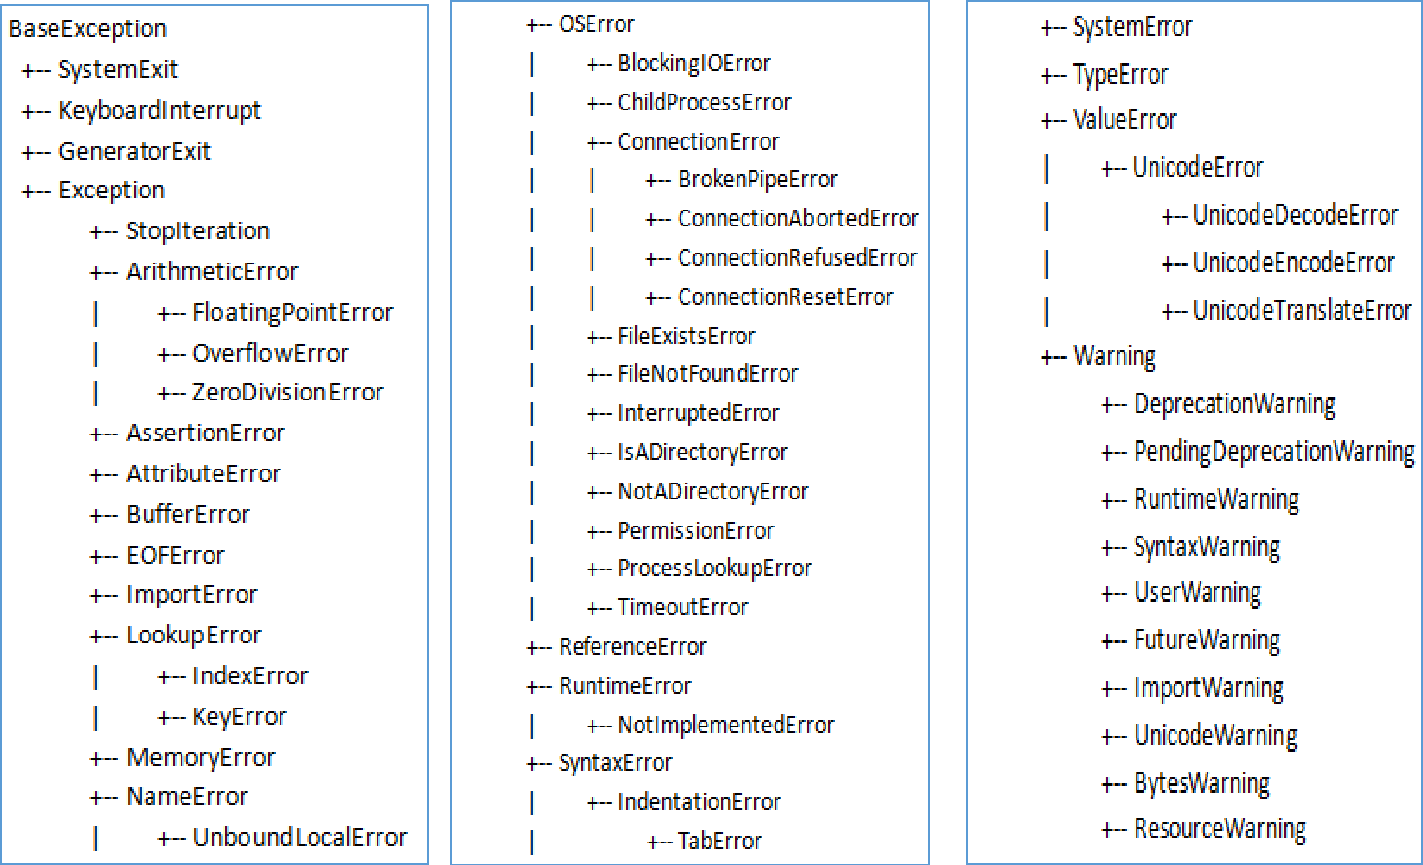

## python异常处理结构

1. try：…… except 

异常类型：……（当try中的结构出现了与except所匹配的异常（except会声明异常类型），则会执行except中的语句），如果try中出现了所有的except都无法捕捉的错误，则依然会报错。

2. try...except...else...

如果try中的代码抛出了异常并且被except语句捕捉则执行相应的异常处理代码，这种情况下就不会执行else中的代码；

如果try中的代码没有引发异常，则执行else块的代码。

3. try...except...finally...

在这种结构中，无论try中的代码是否发生异常，也不管抛出的异常有没有被except语句捕获，finally子句中的代码总是会得到执行。

4. try……except……except…………

一旦try子句中的代码抛出了异常，就按顺序依次检查与哪一个except子句匹配，如果某个except捕捉到了异常，其他的except子句将不会再尝试捕捉异常。该结构类似于多分支选择结构。

## 断言语句

assert 表达式：<br/>
    异常说明语句

当判断表达式expression为真时，什么都不做；如果表达式为假，则抛出异常。 

assert语句一般用于开发程序时对特定必须满足的条件进行验证，仅当__debug__为True时有效。当Python脚本以-O选项编译为字节码文件时，assert语句将被移除以提高运行速度。

## with

使用with自动关闭资源，可以在代码块执行完毕后还原进入该代码块时的现场。

不论何种原因跳出with块，不论是否发生异常，总能保证文件被正确关闭，资源被正确释放。


# 单元测试

单元测试是保证模块质量的重要手段之一，通过单元测试来管理设计好的测试用例，不仅可以避免测试过程中人工反复输入可能引入的错误，还可以重复利用设计好的测试用例，具有很好的可扩展性，大幅度缩短代码的测试时间。

Python标准库unittest提供了大量用于单元测试的类和方法，其中最常用的是TestCase类。

方法名称|	功能说明|	方法名称|	功能说明
:-|:-|:-|:-
assertEqual(a, b)	|a == b	|assertNotEqual(a, b)	|a != b
assertTrue(x)|	bool(x) is True	|assertFalse(x)|	bool(x) is False
assertIs(a, b)	|a is b	|assertIsNot(a, b)	|a is not b
assertIsNone(x)|	x is None	|assertIsNotNone(x)	|x is not None
assertIn(a, b)	|a in b	|assertNotIn(a, b)	|a not in b
assertIsInstance(a, b)	|isinstance(a, b)|	assertNotIsInstance(a, b)	|not isinstance(a, b)
assertAlmostEqual(a, b)|	round(a-b, 7) == 0	|assertNotAlmostEqual(a, b)	|round(a-b, 7) != 0
assertGreater(a, b)	|a > b	|assertGreaterEqual(a, b)	|a >= b
assertLess(a, b)	|a < b	|assertLessEqual(a, b)	|a <= b
assertRegex(s, r)|	r.search(s)|	assertNotRegex(s, r)	|not r.search(s)
setUp()|	每项测试开始之前自动调用该函数	|tearDown()|	每项测试完成之后自动调用该函数

In [1]:
'''
Author: 董付国
email: dongfuguo2005@126.com
Date: 2014-11-10, Updated on 2017-4-1
'''

class Stack:
    def __init__(self, size = 10):
        #使用列表存放栈的元素
        self._content = []
        #初始栈大小
        self._size = size
        #栈中元素个数初始化为0
        self._current = 0
        
    def empty(self):
        #清空栈
        self._content = []
        self._current = 0
        
    def isEmpty(self):
        return not self._content

    def setSize(self, size):
        #如果缩小空间时指定的新大小，小于已有元素个数
        #则删除指定大小之后的已有元素
        if size < self._current:
            for i in range(size, self._current)[::-1]:
                del self._content[i]
            self._current = size
        self._size = size
    
    def isFull(self):
        return self._current == self._size
        
    def push(self, v):
        #模拟入栈，需要先测试栈是否已满
        if self._current < self._size:
            self._content.append(v)
            #栈中元素个数加1
            self._current = self._current+1
        else:
            print('Stack Full!')
            
    def pop(self):
        #模拟出栈，需要先测试栈是否为空
        if self._content:
            #栈中元素个数减1
            self._current = self._current-1
            return self._content.pop()
        else:
            print('Stack is empty!')
            
    def show(self):
        print(self._content)

    def showRemainderSpace(self):
        print('Stack can still PUSH ', self._size-self._current, ' elements.')

if __name__ == '__main__':
    print('Please use me as a module.')


Please use me as a module.


In [2]:
#要测试的模块，在本书第2章
import Stack
#Python单元测试标准库
import unittest

class TestStack(unittest.TestCase):
    def setUp(self):
        self.fp = open('D:\\test_Stack_result.txt', 'a+')

    def tearDown(self):
        self.fp.close()
        
    def test_isEmpty(self):
        try:
            s = Stack.Stack()
            #确保函数返回结果为True
            self.assertTrue(s.isEmpty())
            self.fp.write('isEmpty passed\n')
        except Exception as e:
            self.fp.write('isEmpty failed\n')

    def test_empty(self):
        try:
            s = Stack.Stack(5)
            for i in ['a', 'b', 'c']:
                s.push(i)
            #测试清空栈操作是否工作正常
            s.empty()
            self.assertTrue(s.isEmpty())
            self.fp.write('empty passed\n')
        except Exception as e:
            self.fp.write('empty failed\n')

    def test_isFull(self):
        try:
            s = Stack.Stack(3)
            s.push(1)
            s.push(2)
            s.push(3)
            self.assertTrue(s.isFull())
            self.fp.write('isFull passed\n')
        except Exception as e:
            self.fp.write('isFull failed\n')

    def test_pushpop(self):
        try:
            s = Stack.Stack()
            s.push(3)
            #确保入栈后立刻出栈得到原来的元素
            self.assertEqual(s.pop(), 3)
            s.push('a')
            self.assertEqual(s.pop(), 'a')
            self.fp.write('push and pop passed\n')
        except Exception as e:
            self.fp.write('push or pop failed\n')

    def test_setSize(self):
        try:
            s = Stack.Stack(8)
            for i in range(8):
                s.push(i)
            self.assertTrue(s.isFull())
            #测试扩大栈空间是否正常工作
            s.setSize(9)
            s.push(8)
            self.assertTrue(s.isFull())
            self.assertEqual(s.pop(), 8)
            #测试缩小栈空间是否正常工作
            s.setSize(4)
            self.assertTrue(s.isFull())
            self.assertEqual(s.pop(), 3)
            self.fp.write('setSize passed\n')
        except Exception as e:
            self.fp.write('setSize failed\n')
        
if __name__ == '__main__':
    unittest.main()


ModuleNotFoundError: No module named 'Stack'